In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Data understanding

### intial analysis

In [3]:
startup.shape

(50, 5)

In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### replacing 0.00 values in R&D Spend and Marketing Values

In [6]:
startup['R&D Spend'].mean()

73721.61559999999

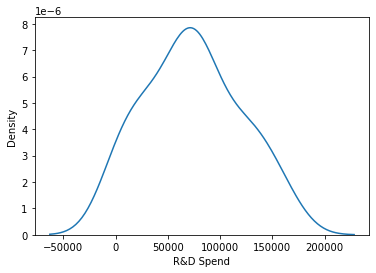

In [7]:
sns.distplot(a=startup['R&D Spend'],hist=False)
plt.show()

In [8]:
startup['R&D Spend'] = startup['R&D Spend'].replace(0.00,round(startup['R&D Spend'].mean(),2))

In [9]:
startup['Marketing Spend'].mean()

211025.09780000005

In [10]:
startup['Marketing Spend'] = startup['Marketing Spend'].replace(0.00,round(startup['Marketing Spend'].mean(),2))

## Label encoder

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
startup['State'] = le.fit_transform(startup['State'])
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


## Assumption Check

##  1 : Linearity

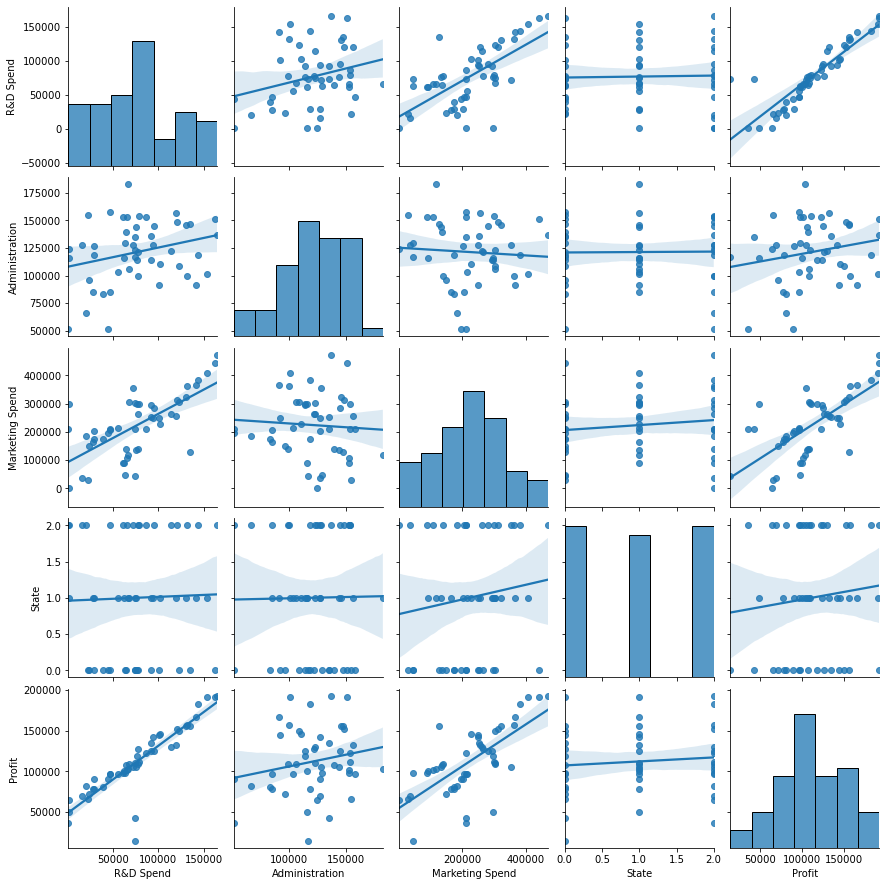

In [13]:
sns.pairplot(data=startup,kind='reg')
plt.show()

## Observation

### R&D  spend linearity is passed

## 2: Normality Check

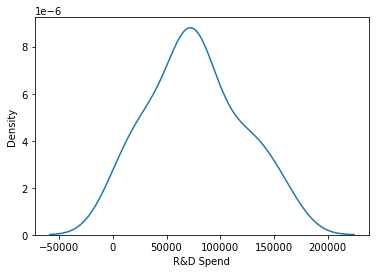

In [14]:
sns.distplot(a=startup['R&D Spend'],hist=False)
plt.show()

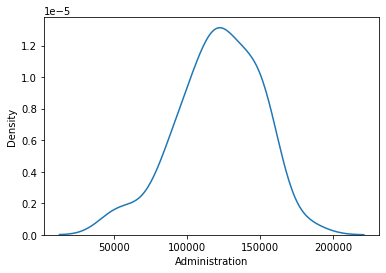

In [15]:
sns.distplot(a=startup['Administration'],hist=False)
plt.show()

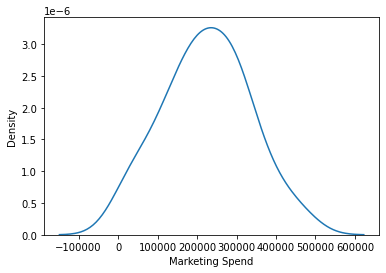

In [16]:
sns.distplot(a=startup['Marketing Spend'],hist=False)
plt.show()

## Observation

### normality is passed

## 3 : Multicollinearity Check

In [17]:
correlation = startup.corr().round(2)
correlation

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.00,0.27,0.67,0.03,0.89
Administration,0.27,1.00,-0.07,0.01,0.20
Marketing Spend,0.67,-0.07,1.00,0.13,0.70
State,0.03,0.01,0.13,1.00,0.10
Profit,0.89,0.20,0.70,0.10,1.00


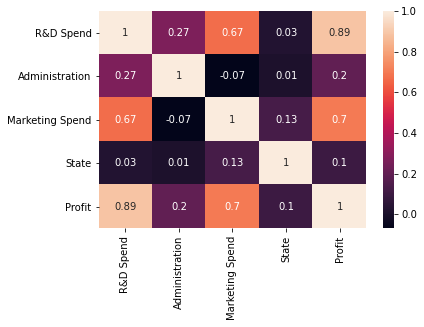

In [18]:
sns.heatmap(data=correlation,annot=True)
plt.show()

## Observation

### Multicollinearity Check is failed

## 4: No autoregression

## observation

### No time related in this data so, no autoregression is passed

## 5. Homoscadascity Check | 6. Zero Residual Mean Check

### Note: These 2 tests can be performed post model training

# model building and training¶


In [19]:
X = startup.drop(labels='Profit',axis=1)
y = startup[['Profit']]

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std_scalar  = StandardScaler()
scaled_X    = std_scalar.fit_transform(X)
scaled_X    = pd.DataFrame(data=scaled_X,columns=['RDS','ADM','MS','STATE'])
scaled_X

,RDS,ADM,MS,STATE
0,2.068016,0.560753,2.281641,1.212678
1,2.003850,1.082807,2.025190,-1.212678
2,1.790325,-0.728257,1.694445,0.000000
3,1.578830,-0.096365,1.466969,1.212678
4,1.526008,-1.079919,1.310341,0.000000
5,1.287431,-0.776239,1.279928,1.212678
6,1.351295,0.932147,-0.882591,-1.212678
7,1.250614,0.871980,0.921403,0.000000
8,1.023110,0.986952,0.808622,1.212678
9,1.088228,-0.456640,0.747634,-1.212678


## Rename column name

In [22]:
startup = startup.rename(columns={'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS','State':'STATE'})
startup

,RDS,ADM,MS,STATE,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


## using stats libary

In [23]:
import statsmodels.formula.api as smf

In [24]:
lin_model = smf.ols('Profit ~RDS+ADM+MS+STATE',data=startup).fit()

In [25]:
y_predict = lin_model.predict(scaled_X)
y_predict

0     41873.854818
1     35260.404702
2     38566.906483
3     41873.446072
4     38566.689430
5     41873.219106
6     35259.746120
7     38566.491979
8     41873.021695
9     35259.652488
10    38565.949921
11    35259.237054
12    38565.837089
13    35259.114596
14    38566.284334
15    41872.880287
16    35258.885038
17    41872.574985
18    38565.824270
19    41872.398585
20    35258.873801
21    41872.320856
22    38565.540159
23    38565.426998
24    41872.176841
25    35258.594614
26    38565.467102
27    41872.238869
28    38565.320916
29    41871.990799
30    38565.208181
31    41871.905230
32    35258.512751
33    38565.171567
34    35258.346384
35    41871.698560
36    38564.730851
37    35258.252764
38    41871.252215
39    35258.161994
40    35258.014278
41    38564.677126
42    35257.904882
43    41871.108636
44    35257.832429
45    41870.847093
46    38564.333776
47    35258.787345
48    41870.936992
49    35258.677078
dtype: float64

## R2 Score

In [26]:
model_1 = smf.ols('Profit ~RDS',data=startup).fit()
print('r2 square           :',round(model_1.rsquared,5))
print('adjusted r2 square  :',round(model_1.rsquared_adj,5))
print('AIC                 :',round(model_1.aic,5))
print('BIC                 :',round(model_1.bic,5))

r2 square           : 0.78722
adjusted r2 square  : 0.78279
AIC                 : 1127.9345
BIC                 : 1131.75854


In [27]:
model_2 = smf.ols('Profit ~RDS+ADM',data=startup).fit()
print('r2 square           :',round(model_2.rsquared,5))
print('adjusted r2 square  :',round(model_2.rsquared_adj,5))
print('AIC                 :',round(model_2.aic,5))
print('BIC                 :',round(model_2.bic,5))

r2 square           : 0.78873
adjusted r2 square  : 0.77974
AIC                 : 1129.57773
BIC                 : 1135.3138


In [28]:
model_3 = smf.ols('Profit ~RDS+MS',data=startup).fit()
print('r2 square           :',round(model_3.rsquared,5))
print('adjusted r2 square  :',round(model_3.rsquared_adj,5))
print('AIC                 :',round(model_3.aic,5))
print('BIC                 :',round(model_3.bic,5))

r2 square           : 0.80714
adjusted r2 square  : 0.79894
AIC                 : 1125.01956
BIC                 : 1130.75563


In [29]:
model_4 = smf.ols('Profit ~RDS+ADM+MS',data=startup).fit()
print('r2 square           :',round(model_4.rsquared,5))
print('adjusted r2 square  :',round(model_4.rsquared_adj,5))
print('AIC                 :',round(model_4.aic,5))
print('BIC                 :',round(model_4.bic,5))

r2 square           : 0.80727
adjusted r2 square  : 0.7947
AIC                 : 1126.98757
BIC                 : 1134.63567


In [30]:
model_5 = smf.ols('Profit ~RDS+ADM+STATE',data=startup).fit()
print('r2 square           :',round(model_4.rsquared,5))
print('adjusted r2 square  :',round(model_4.rsquared_adj,5))
print('AIC                 :',round(model_4.aic,5))
print('BIC                 :',round(model_4.bic,5))

r2 square           : 0.80727
adjusted r2 square  : 0.7947
AIC                 : 1126.98757
BIC                 : 1134.63567


In [31]:
model_6 = smf.ols('Profit ~RDS+ADM+MS+STATE',data=startup).fit()
print('r2 square           :',round(model_4.rsquared,5))
print('adjusted r2 square  :',round(model_4.rsquared_adj,5))
print('AIC                 :',round(model_4.aic,5))
print('BIC                 :',round(model_4.bic,5))

r2 square           : 0.80727
adjusted r2 square  : 0.7947
AIC                 : 1126.98757
BIC                 : 1134.63567


### model 4 is best because adjusted r2 score get good contribution and less AIC error values

## ZERO RESIDUAL MEAN

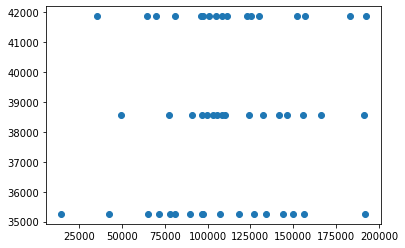

In [35]:
plt.scatter(x=y,y=y_predict)
plt.show()

## observation

### ZERO RESIDUAL MEAN is failed

### ==================================================================================

# Log Transformation

In [38]:
startup2 = startup.copy()

In [39]:
startup2['log_RDS'] = np.log(startup2['RDS'])
startup2['log_ADM'] = np.log(startup2['ADM'])
startup2['log_MS'] = np.log(startup2['MS'])
startup2['log_STATE'] = np.log(startup2['STATE'])
startup2

,RDS,ADM,MS,STATE,Profit,log_RDS,log_ADM,log_MS,log_STATE
0,165349.20,136897.80,471784.10,2,192261.83,12.015815,11.826990,13.064277,0.693147
1,162597.70,151377.59,443898.53,0,191792.06,11.999034,11.927533,13.003351,-inf
2,153441.51,101145.55,407934.54,1,191050.39,11.941075,11.524316,12.918862,0.000000
3,144372.41,118671.85,383199.62,2,182901.99,11.880151,11.684117,12.856311,0.693147
4,142107.34,91391.77,366168.42,1,166187.94,11.864338,11.422911,12.810849,0.000000
5,131876.90,99814.71,362861.36,2,156991.12,11.789624,11.511071,12.801776,0.693147
6,134615.46,147198.87,127716.82,0,156122.51,11.810178,11.899540,11.757571,-inf
7,130298.13,145530.06,323876.68,1,155752.60,11.777580,11.888138,12.688118,0.000000
8,120542.52,148718.95,311613.29,2,152211.77,11.699758,11.909814,12.649518,0.693147
9,123334.88,108679.17,304981.62,0,149759.96,11.722659,11.596155,12.628007,-inf


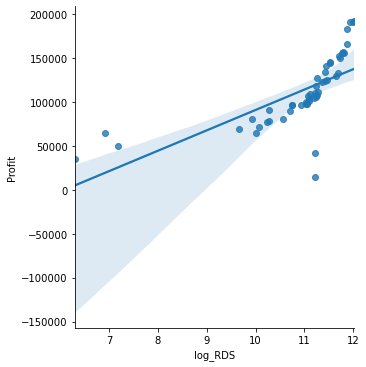

In [40]:
sns.lmplot(x='log_RDS',y='Profit',data=startup2)
plt.show()

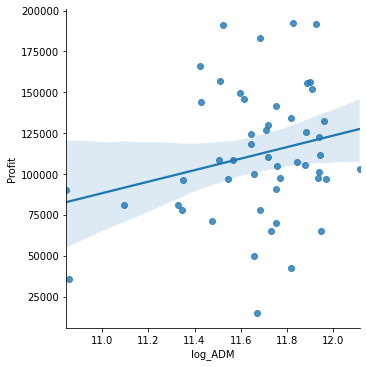

In [41]:
sns.lmplot(x='log_ADM',y='Profit',data=startup2)
plt.show()

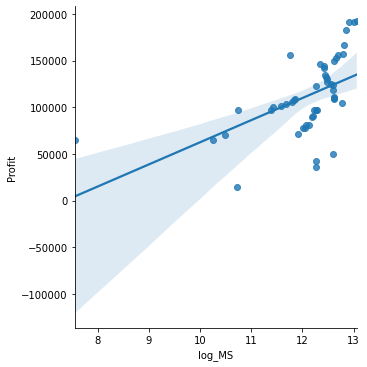

In [42]:
sns.lmplot(x='log_MS',y='Profit',data=startup2)
plt.show()

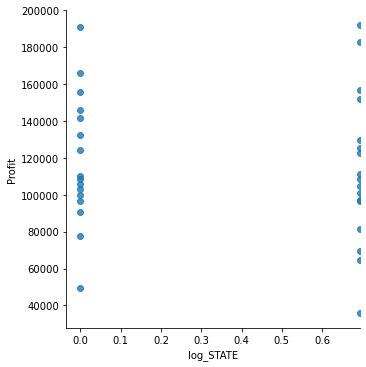

In [43]:
sns.lmplot(x='log_STATE',y='Profit',data=startup2)
plt.show()

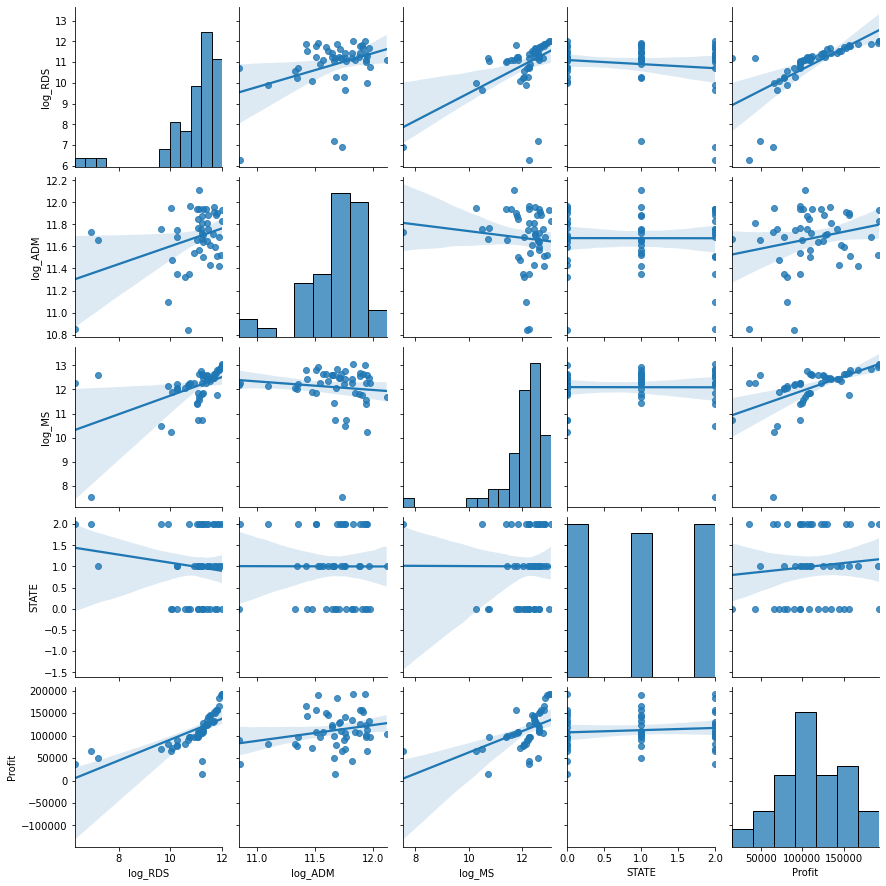

In [44]:
sns.pairplot(data=startup2[['log_RDS','log_ADM','log_MS','STATE','Profit']],kind='reg')
plt.show()

## observation

### Log Transformation is failed

## ============================= End ====================================